## Outline

* Downloading dataset (CIFAR10)
* `Dataloader` in `torch.utils`
* Visualising images
* Single and multiple convolutional layers
* LeNet
* Training LeNet
* Training on GPU
* Simple visualisation
* Exercises

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## Data loading

In [2]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data\cifar-10-python.tar.gz to ./data


In [3]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [26]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
7


## Visualise data

In [80]:
img = images[0]
print(type(img))

<class 'torch.Tensor'>


In [81]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [82]:
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)

(32, 32, 3)


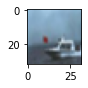

In [83]:
plt.figure(figsize = (1,1))
plt.imshow(npimg)
plt.show()

In [59]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

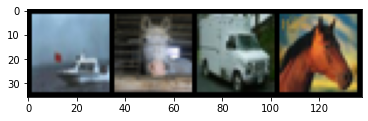

ship horse truck horse


In [60]:
imshow(torchvision.utils.make_grid(images))
print(' '.join([classes[labels[j]] for j in range(4)]))

## Single Convolutional Layer

In [69]:
import torch.nn as nn

class FirstCNN(nn.Module):
    def __init__(self): 
        super(FirstCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=(1,1), stride=(2,2)) # padding=(1,1), stride=(2,2))
        
    def forward(self, x):
        x = self.conv1(x)
        return x

In [71]:
net = FirstCNN()

In [72]:
out = net(images)
out.shape

torch.Size([4, 16, 16, 16])

In [73]:
for param in net.parameters():
    print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [74]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(16, 16)


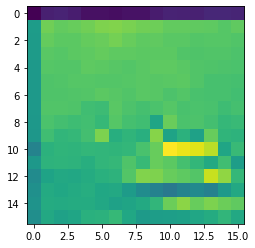

In [79]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

## Deep Convolutional Network

In [84]:
class FirstCNN_v2(nn.Module):
    def __init__(self): 
        super(FirstCNN_v2, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 8, 3),   # (N, 3, 32, 32) -> (N, 8, 30, 30)
            nn.Conv2d(8, 16, 3)   # (N, 8, 30, 30) -> (N, 16, 28, 28)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [85]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

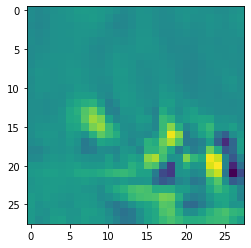

In [86]:
plt.imshow(out[0, 0, :, :].detach().numpy())

In [90]:
class FirstCNN_v3(nn.Module):
    def __init__(self): 
        super(FirstCNN_v3, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 6, 5),          # (N, 3, 32, 32) -> (N, 6, 28, 28)
            nn.AvgPool2d(2, stride=2),   # (N, 6, 28, 28) -> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5),         # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.AvgPool2d(2, stride=2)    # (N, 16, 10, 10) -> (N, 16, 5, 5)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [91]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

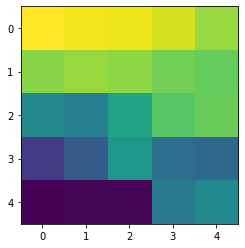

In [93]:
plt.imshow(out[0, 0, :, :].detach().numpy())

## LeNet

In [105]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        print(x.shape)
        x = self.cnn_model(x)
        print(x.shape)
        x = x.view(x.size(0), -1)
        print(x.shape)
        x = self.fc_model(x)
        print(x.shape)
        return x

In [106]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [110]:
print(out)

tensor([[-0.0183, -0.0366,  0.0648, -0.0625, -0.0698,  0.0072,  0.0414, -0.0661,
          0.0599, -0.0728],
        [-0.0126, -0.0318,  0.0570, -0.0271, -0.0639,  0.0135,  0.0478, -0.0636,
          0.0670, -0.0822],
        [-0.0208, -0.0295,  0.0681, -0.0354, -0.0955,  0.0038,  0.0311, -0.0710,
          0.0625, -0.0492],
        [-0.0284, -0.0295,  0.0578, -0.0191, -0.0628,  0.0136,  0.0447, -0.0588,
          0.0767, -0.0519]], grad_fn=<AddmmBackward0>)


In [114]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([2, 8, 2, 8])


## Training LeNet

In [115]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [116]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [117]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [118]:
net = LeNet()

In [119]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/16, Test acc: 37.47, Train acc: 37.32
Epoch: 1/16, Test acc: 43.11, Train acc: 43.74
Epoch: 2/16, Test acc: 45.87, Train acc: 47.13
Epoch: 3/16, Test acc: 49.00, Train acc: 50.80
Epoch: 4/16, Test acc: 50.31, Train acc: 52.43
Epoch: 5/16, Test acc: 52.10, Train acc: 55.03
Epoch: 6/16, Test acc: 53.08, Train acc: 56.62
Epoch: 7/16, Test acc: 53.28, Train acc: 57.67
Epoch: 8/16, Test acc: 54.07, Train acc: 58.70
Epoch: 9/16, Test acc: 54.90, Train acc: 60.71
Epoch: 10/16, Test acc: 54.48, Train acc: 61.12
Epoch: 11/16, Test acc: 55.11, Train acc: 62.60
Epoch: 12/16, Test acc: 55.66, Train acc: 63.27
Epoch: 13/16, Test acc: 55.64, Train acc: 63.99
Epoch: 14/16, Test acc: 55.54, Train acc: 64.72
Epoch: 15/16, Test acc: 56.41, Train acc: 65.97


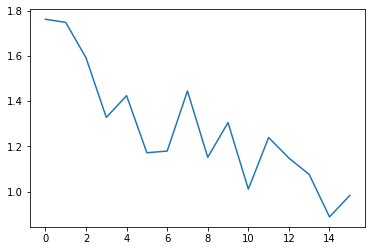

Wall time: 12min 13s


In [120]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

## Move to GPU

In [67]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [ ]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [70]:
%%time
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
    print('Epoch: %d/%d' % (epoch, max_epochs))

Epoch: 0/16
Epoch: 1/16
Epoch: 2/16
Epoch: 3/16
Epoch: 4/16
Epoch: 5/16
Epoch: 6/16
Epoch: 7/16
Epoch: 8/16
Epoch: 9/16
Epoch: 10/16
Epoch: 11/16
Epoch: 12/16
Epoch: 13/16
Epoch: 14/16
Epoch: 15/16
CPU times: user 1min 37s, sys: 1.97 s, total: 1min 38s
Wall time: 1min 39s


In [104]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 56.11, Train acc: 63.25


## Basic Visualisation

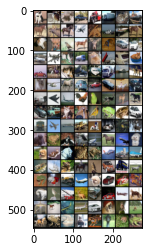

In [131]:
imshow(torchvision.utils.make_grid(images))

In [128]:
net = net.to('cpu')

In [132]:
out = net(images)
print(out.shape)

torch.Size([128, 10])


In [133]:
out = net.cnn_model[0](images)
out.shape

torch.Size([128, 6, 28, 28])

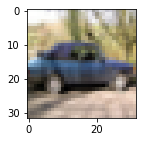

In [137]:
image_id = 3
plt.figure(figsize = (2,2))
imshow(images[image_id,])

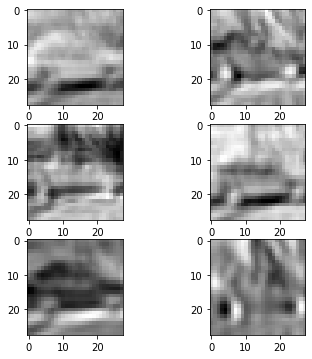

In [145]:
plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(6):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()

## Exercises

* Modify LeNet to work with ReLU instead of Tanh -> What is the impact on training time, final loss
* We have observed over-fitting -> Use weight_decay in torch.optim to add L2 regularisation
* Instead of CIFAR10, use the MNIST data available from `torchvision.datasets.MNIST`. Download and visualise MNIST data.
* But importantly MNIST images have only 1 channel instead of 3 channels in the case of CIFAR10. Modify LeNet to work with MNIST. Train and find optimised test accuracy.

In [260]:
import numpy as np

import torch
import torch.nn as nn
import torchvision

In [261]:
train = torchvision.datasets.MNIST(root = './MNIST/', train = True, download = True, transform = torchvision.transforms.ToTensor())
test = torchvision.datasets.MNIST(root = './MNIST/', train = False, download = True, transform = torchvision.transforms.ToTensor())

In [262]:
trainloader = torch.utils.data.DataLoader(train, batch_size=128, shuffle=True)
testloader = torch.utils.data.DataLoader(test, batch_size=128)

In [263]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels)

torch.Size([128, 1, 28, 28])
torch.Size([1, 28, 28])
tensor([8, 5, 5, 1, 1, 3, 5, 3, 3, 7, 5, 0, 3, 0, 4, 5, 1, 4, 3, 9, 9, 9, 8, 1,
        3, 0, 9, 0, 2, 9, 0, 0, 4, 6, 5, 6, 5, 4, 3, 3, 0, 1, 8, 9, 6, 2, 3, 8,
        7, 8, 9, 5, 3, 8, 7, 8, 9, 8, 9, 1, 4, 3, 9, 6, 4, 4, 7, 2, 0, 0, 7, 1,
        5, 4, 3, 6, 6, 4, 9, 0, 5, 5, 4, 4, 0, 9, 6, 1, 5, 5, 0, 9, 3, 8, 1, 6,
        6, 5, 3, 8, 0, 3, 0, 1, 7, 7, 1, 1, 5, 7, 2, 4, 7, 2, 0, 0, 4, 4, 5, 3,
        8, 3, 4, 8, 9, 9, 9, 1])


In [264]:
def imshow(img):
    plt.imshow(np.transpose(img.numpy(),(1,2,0)),cmap='binary')

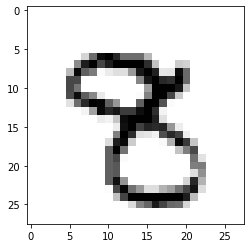

In [268]:
imshow(images[0])

In [269]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [273]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(1, 6, 5),         # (N, 1, 28, 28) -> (N,  6, 24, 24)
            nn.LeakyReLU(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 24, 24) -> (N,  6, 12, 12)
            nn.Conv2d(6, 16, 5),        # (N, 6, 12, 12) -> (N, 16, 8, 8)  
            nn.LeakyReLU(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 8, 8) -> (N, 16, 4, 4)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(256,120),         # (N, 256) -> (N, 120)
            nn.LeakyReLU(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.LeakyReLU(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

Epoch: 0/16, Test acc: 94.6, Train acc: 94.355
Epoch: 1/16, Test acc: 97.29, Train acc: 97.26833333333333
Epoch: 2/16, Test acc: 97.98, Train acc: 98.06333333333333
Epoch: 3/16, Test acc: 98.09, Train acc: 98.30833333333334
Epoch: 4/16, Test acc: 98.09, Train acc: 98.43666666666667
Epoch: 5/16, Test acc: 98.57, Train acc: 98.84
Epoch: 6/16, Test acc: 98.69, Train acc: 98.99666666666667
Epoch: 7/16, Test acc: 98.71, Train acc: 99.135
Epoch: 8/16, Test acc: 98.65, Train acc: 99.025
Epoch: 9/16, Test acc: 98.56, Train acc: 99.285
Epoch: 10/16, Test acc: 98.84, Train acc: 99.32833333333333
Epoch: 11/16, Test acc: 98.72, Train acc: 99.445
Epoch: 12/16, Test acc: 98.78, Train acc: 99.435
Epoch: 13/16, Test acc: 98.9, Train acc: 99.45
Epoch: 14/16, Test acc: 98.75, Train acc: 99.4
Epoch: 15/16, Test acc: 98.83, Train acc: 99.60333333333334


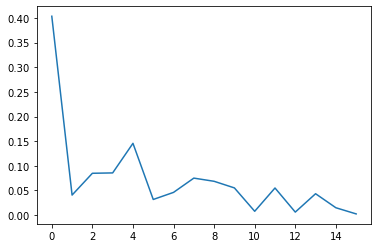

Wall time: 7min 56s


In [274]:
%%time
net = LeNet()
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.Adam(net.parameters())
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):
    
    for i,data in enumerate(trainloader,0):
        inputs, labels = data
        
        opt.zero_grad()
        
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
    loss_epoch_arr.append(loss.item())
    
    print(f'Epoch: {epoch}/{max_epochs}, Test acc: {evaluation(testloader)}, Train acc: {evaluation(trainloader)}')
    
plt.plot(loss_epoch_arr)
plt.show()

In [278]:
dataiter = iter(testloader)
images, labels = dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels)

torch.Size([128, 1, 28, 28])
torch.Size([1, 28, 28])
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0,
        2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4,
        1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2,
        5, 4, 7, 6, 7, 9, 0, 5])
